In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from surprise import Reader, Dataset, SVD, accuracy, BaselineOnly
from surprise.model_selection import cross_validate, GridSearchCV, train_test_split
import random 

In [8]:
# functions to read data from csv files
def readRatings():
    path = "data/filtered_ratings.csv"
    data = pd.read_csv(path, usecols=[0, 1, 2])
    return data

def readBooks():
    path = "data/filtered_books.csv"
    data = pd.read_csv(path)
    return data


In [16]:
df_books = readBooks()
df_ratings = readRatings()
df_ratings.info()
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65496 entries, 0 to 65495
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   UserId  65496 non-null  int64
 1   BookId  65496 non-null  int64
 2   Rating  65496 non-null  int64
dtypes: int64(3)
memory usage: 1.5 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   BookId               199 non-null    int64 
 1   ISBN                 199 non-null    object
 2   Book.Title           199 non-null    object
 3   Book.Author          199 non-null    object
 4   Year.Of.Publication  199 non-null    int64 
 5   Publisher            199 non-null    object
 6   Image.URL.S          199 non-null    object
 7   Image.URL.M          199 non-null    object
 8   Image.URL.L          199 non-null    object
dtypes: int64(2), object(7)
memory u

In [15]:
unique_user_count = df_ratings['UserId'].nunique()
print("Count of unique userId:", unique_user_count)

Count of unique userId: 21610


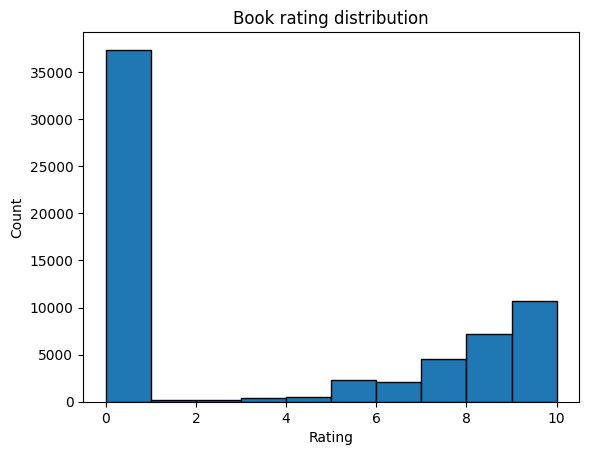

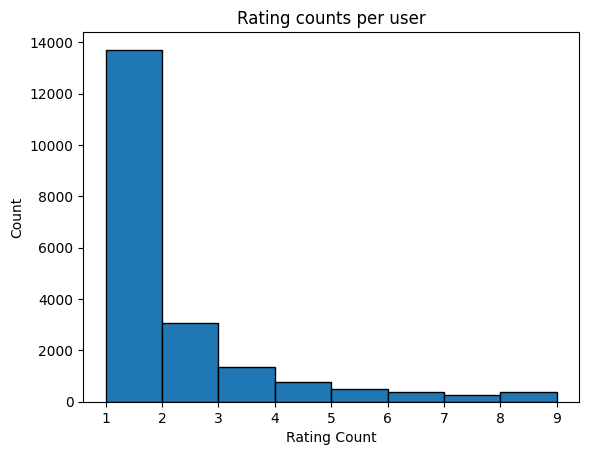

In [12]:
# plot the rating distribution, y axis is the percentage
plt.hist(df_ratings['Rating'], bins=10, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Book rating distribution')
plt.show()

# Plot the rating count per user
df_user_rating_count = df_ratings.groupby('UserId')['Rating'].count().reset_index()
df_user_rating_count.columns = ['UserId', 'RatingCount']
rating_count_vector = df_user_rating_count['RatingCount'].values

plt.hist(rating_count_vector, bins=range(1, 10,1), edgecolor='black')
plt.xlabel('Rating Count')
plt.ylabel('Count')
plt.title('Rating counts per user')
plt.show()

In [13]:
# Do a grid search to find the optimal parameters for SVD
reader = Reader(rating_scale=(0, 10))
data = Dataset.load_from_df(df_ratings[['UserId', 'BookId', 'Rating']], reader)
param_grid = {"n_epochs": [5, 10, 20, 50], "lr_all": [0.002, 0.005, 0.01, 0.03], "reg_all": [0.1, 0.2, 0.4, 0.6]}
gs = GridSearchCV(SVD, param_grid, measures=["rmse", "mae"], cv=3)
gs.fit(data)
# best RMSE score
print("Best RMSE", gs.best_score["rmse"])
# best MAE score
print("Best MAE:", gs.best_score["mae"])
# combination of parameters that gave the best RMSE score
print("Best parameters:", gs.best_params["rmse"])

Best RMSE 3.7783299589288863
Best MAE: 3.4291609062127058
Best parameters: {'n_epochs': 10, 'lr_all': 0.01, 'reg_all': 0.4}


In [14]:
# Train the model with the best parameters
algo = SVD(n_epochs=gs.best_params['rmse']['n_epochs'], lr_all=gs.best_params['rmse']['lr_all'], reg_all=gs.best_params['rmse']['reg_all'])
full_trainset = data.build_full_trainset()
algo.fit(full_trainset)

In [2]:
import pandas as pd
from faker import Faker
from datetime import datetime

# Load the data
df = pd.read_csv('data/filtered_ratings.csv')

# Initialize Faker
fake = Faker()

# Function to generate random date between a start and end date
def random_date(start, end):
    return fake.date_between(start_date=start, end_date=end)

# Generate random dates between 2010-01-01 and now
start_date = datetime(2023, 9, 1)
end_date = datetime.now()

df['RatingDate'] = [random_date(start_date, end_date) for _ in range(len(df))]

# Save the updated dataframe back to CSV
df.to_csv('data/filtered_ratings.csv', index=False)